## Специализированные программные библиотеки для анализа данных.

Обершт Елена, 23225


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/My Drive/Classroom/Курс АД и МО (ФИТ - 2024)')

### Импортируем необходимые модули

In [ ]:
import numpy as np
import scipy, datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### 1. Базовые знания о данных

У вас есть датасет с данными об ирисах. Посмотрите на ваши данные, выведите статистику для них. Изобразите на графике распределение значений параметров вашего набора.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X = pd.DataFrame(iris.data.T, index = iris.feature_names).T

In [ ]:
X.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [ ]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<Axes: xlabel='petal width (cm)', ylabel='Count'>

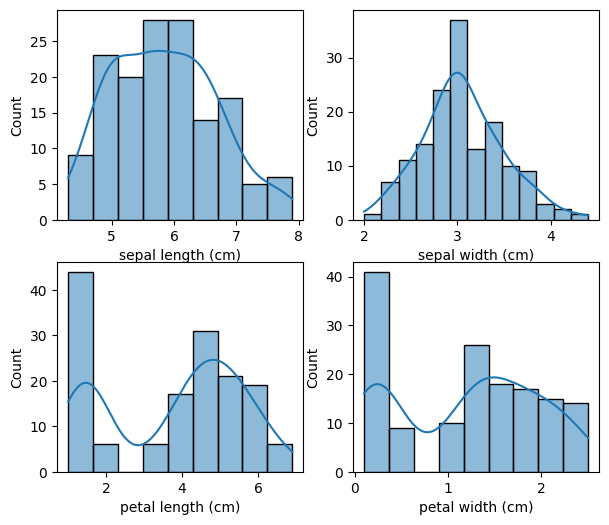

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(7,6))

sns.histplot(X['sepal length (cm)'], kde=True, ax=ax[0, 0])
sns.histplot(X['sepal width (cm)'], kde=True, ax=ax[0, 1])
sns.histplot(X['petal length (cm)'], kde=True, ax=ax[1, 0])
sns.histplot(X['petal width (cm)'], kde=True, ax=ax[1, 1])

### 2. Визуализация результатов PCA

Проведите PCA анализ для ваших данных.
1. Постройте диаграмму рассеяния в координатах PC1, PC2. Цвет точек должен соответствовать целевой переменной y, где её значения - один из 3 видов ирисов.
2. Постройте биплот, отражающий влияние исходных параметров на PC1 и PC2.

In [ ]:
# 1

sc = StandardScaler()
sc.fit(X.astype('float64'))
Xsc = sc.transform(X.astype('float64'))
Xsc = pd.DataFrame(Xsc, index=X.index, columns=X.columns)

skpcamod = PCA().fit(X = Xsc)
scores_skl = pd.DataFrame(skpcamod.transform(Xsc)[:,:2])
scores_skl.columns = ['PC1','PC2']

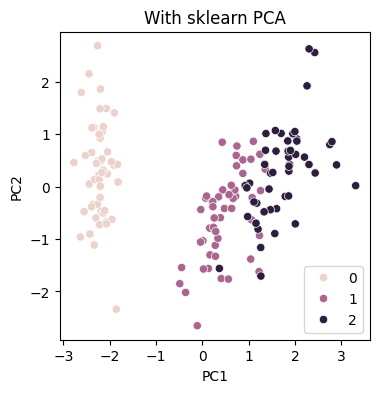

In [ ]:
fig, axe = plt.subplots(figsize = (4, 4))
sns.scatterplot(x = 'PC1', y = 'PC2', data = scores_skl, hue = y)
axe.set_title('With sklearn PCA');

In [ ]:
sklearn_pca = PCA(n_components=3)

In [ ]:
sklearn_transf = pd.DataFrame(sklearn_pca.fit_transform(Xsc), # проводим МГК стандартизованных данных
                              columns = ['PC1','PC2','PC3'])

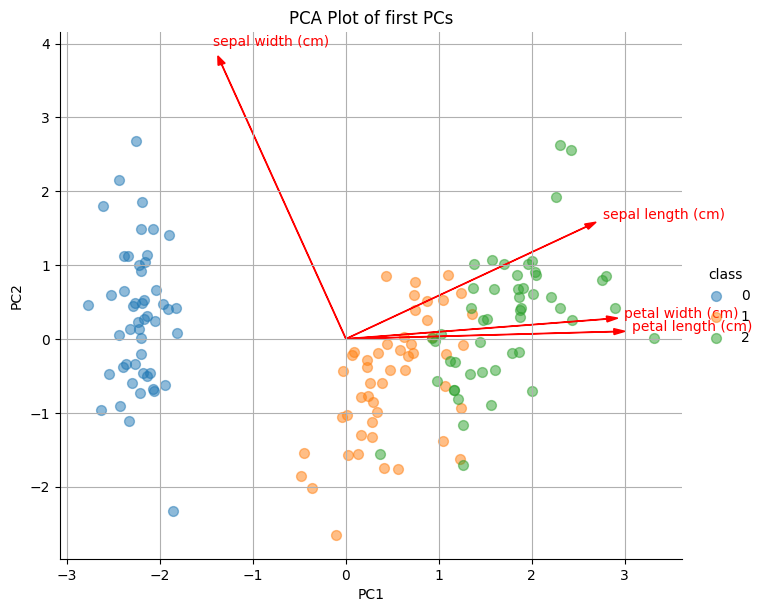

In [ ]:
df_pca = pd.DataFrame(sklearn_transf)
df_pca = pd.concat([pd.Series(y), df_pca], axis = 1)
df_pca.columns = ['class','PC1', 'PC2','PC3']

sns.lmplot(x = 'PC1', y = 'PC2', data=df_pca, fit_reg = False,
           hue = 'class', height = 6, aspect = 7/6, scatter_kws={"s": 50, 'alpha':0.5})

xvector = sklearn_pca.components_[0]
yvector = sklearn_pca.components_[1]

for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*df_pca.PC1.max()*1.5, yvector[i]*df_pca.PC2.max()*1.5,
              color='r', width=0.005, head_width=0.08)
    plt.text(xvector[i]*df_pca.PC1.max()*1.6, yvector[i]*df_pca.PC2.max()*1.6,
             list(iris.feature_names)[i], color='r')

plt.grid()
_ = plt.title('PCA Plot of first PCs')

### 3. Аккумулирование информации по неделям

Определите прирост числа заражений в процентах за неделю.

График постройте для следующих регионов:

`
regs = ['Забайкальский край', 'Ингушетия', 'Магаданская обл.', 'Москва', 'Мурманская обл.',
        'Новосибирская обл.', 'Омская обл.', 'Санкт-Петербург', 'Татарстан', 'Чечня']
`

In [ ]:
ncov_ru_de = pd.read_csv('/content/drive/MyDrive/Classroom/Курс АД и МО (ФИТ - 2024)/Елена Дмитриевна Обершт - COVID_RU_Ya_descr.csv')

ncov_ru_stat = pd.read_csv('/content/drive/MyDrive/Classroom/Курс АД и МО (ФИТ - 2024)/Елена Дмитриевна Обершт - COVID_RU_Ya_stat_2022.csv')

In [ ]:
ncov_ru = pd.merge(
    ncov_ru_stat, ncov_ru_de,
    left_on='Регион',
    right_on='Регион',
    how='left'
)

In [ ]:
ncov_ru['Дата'] = pd.to_datetime(ncov_ru.Дата) # , format = "%d.%m.%y"

ncov_ru['Дата'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

<ipython-input-102-884eddc71aea>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ncov_ru['Дата'] = pd.to_datetime(ncov_ru.Дата) # , format = "%d.%m.%y"


0       2020-10-20
1       2021-12-29
2       2021-01-23
3       2021-05-14
4       2022-04-12
           ...    
79453   2021-01-10
79454   2021-07-03
79455   2020-12-16
79456   2020-11-26
79457   2021-04-01
Name: Дата, Length: 79458, dtype: datetime64[ns]

In [ ]:
# "Активных" - число активных случаев = 'Заражений' - 'Выздоровлений' - 'Смертей'
ncov_ru['Active'] = ncov_ru['Заражений'] - ncov_ru['Выздоровлений'] - ncov_ru['Смертей']

# "Активных на 100К населения"
ncov_ru['Active_100k'] = ncov_ru['Active'] * 100000 / ncov_ru['Регион население']

# "Заражений на 100К населения"
ncov_ru['Infected_100k'] = ncov_ru['Заражений'] * 100000 / ncov_ru['Регион население']

# "Смертей на 100К населения"
ncov_ru['Dead_100k'] = ncov_ru['Смертей'] * 100000 / ncov_ru['Регион население']

# "Заражений за день на 100К населения"
ncov_ru['Infected_100kpd'] = ncov_ru['Заражений за день'] * 100000 / ncov_ru['Регион население']

# "Смертей за день на 100К населения"
ncov_ru['Dead_100kpd'] = ncov_ru['Смертей за день'] * 100000 / ncov_ru['Регион население']

In [ ]:
ncov_ru = ncov_ru.set_index(['Дата', 'Регион'])

In [ ]:
ncov_ru

,,Unnamed: 0_x,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день,"Летальность, %",Unnamed: 0_y,ФО,Регион название,Регион население,Active,Active_100k,Infected_100k,Dead_100k,Infected_100kpd,Dead_100kpd
Дата,Регион,,,,,,,,,,,,,,,,,,
2020-10-20,Пермский край,0,11862,7993,355,5,128,81,2.99,17,Приволжский федеральный округ,Пермский край,2623122,3514,133.962507,452.209238,13.533492,4.879682,0.190613
2021-12-29,Татарстан,1,42537,36175,1425,5,80,100,3.35,20,Приволжский федеральный округ,Республика Татарстан,3894284,4937,126.775551,1092.293217,36.592092,2.054293,0.128393
2021-01-23,Марий Эл,2,10309,8980,147,0,46,56,1.43,12,Приволжский федеральный округ,Республика Марий Эл,682333,1182,173.229200,1510.845877,21.543733,6.741576,0.000000
2021-05-14,Красноярский край,3,71858,66180,3628,8,102,90,5.05,44,Сибирский федеральный округ,Красноярский край,2876497,2050,71.267239,2498.107942,126.125631,3.545980,0.278116
2022-04-12,Крым,4,180027,172186,5158,6,141,157,2.87,79,Южный федеральный округ,Республика Крым,1913731,2683,140.197342,9407.121482,269.525863,7.367807,0.313524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-10,Кемеровская обл.,79453,27032,24221,488,1,116,105,1.81,43,Сибирский федеральный округ,Кемеровская область (Кузбасс),2694877,2323,86.200595,1003.088453,18.108433,4.304464,0.037107
2021-07-03,Смоленская обл.,79454,35314,31844,1133,8,257,93,3.21,69,Центральный федеральный округ,Смоленская область,949348,2337,246.168950,3719.816126,119.345066,27.071211,0.842684
2020-12-16,Ульяновская обл.,79455,32062,29113,415,0,289,324,1.29,22,Приволжский федеральный округ,Ульяновская область,1246618,2534,203.269967,2571.918583,33.290070,23.182723,0.000000


In [ ]:
# сортируем по датам, берем последние 14 день - чтобы считать прирост за неделю

top = 14

#ncov_ru_j = ncov_ru_j.groupby(level=1).apply(lambda ncov_ru_j: ncov_ru_j.sort_index(by='Заражений')[-top:])
ncov_ru_j = ncov_ru.groupby(level=1).apply(lambda ncov_ru_j: ncov_ru_j.sort_index()[-top:])
#df.index = df.index.droplevel(0)
ncov_ru_j = ncov_ru_j[:140]

In [ ]:
ncov_ru_j.to_csv('out.csv')

In [ ]:
# строим график прироста на 10 региоов

newdf = ncov_ru_j[['Заражений']].copy()
newdf

Заражений
Регион  Дата       Регион            
Адыгея  2022-09-19 Адыгея       52277
        2022-09-20 Адыгея       52358
        2022-09-21 Адыгея       52444
        2022-09-22 Адыгея       52535
        2022-09-23 Адыгея       52624
...                               ...
Бурятия 2022-09-28 Бурятия     150619
        2022-09-29 Бурятия     150705
        2022-09-30 Бурятия     150795
        2022-10-01 Бурятия     150845
        2022-10-02 Бурятия     150916

[140 rows x 1 columns]

In [ ]:
newdf.index

MultiIndex([( 'Адыгея', '2022-09-19',  'Адыгея'),
            ( 'Адыгея', '2022-09-20',  'Адыгея'),
            ( 'Адыгея', '2022-09-21',  'Адыгея'),
            ( 'Адыгея', '2022-09-22',  'Адыгея'),
            ( 'Адыгея', '2022-09-23',  'Адыгея'),
            ( 'Адыгея', '2022-09-24',  'Адыгея'),
            ( 'Адыгея', '2022-09-25',  'Адыгея'),
            ( 'Адыгея', '2022-09-26',  'Адыгея'),
            ( 'Адыгея', '2022-09-27',  'Адыгея'),
            ( 'Адыгея', '2022-09-28',  'Адыгея'),
            ...
            ('Бурятия', '2022-09-23', 'Бурятия'),
            ('Бурятия', '2022-09-24', 'Бурятия'),
            ('Бурятия', '2022-09-25', 'Бурятия'),
            ('Бурятия', '2022-09-26', 'Бурятия'),
            ('Бурятия', '2022-09-27', 'Бурятия'),
            ('Бурятия', '2022-09-28', 'Бурятия'),
            ('Бурятия', '2022-09-29', 'Бурятия'),
            ('Бурятия', '2022-09-30', 'Бурятия'),
            ('Бурятия', '2022-10-01', 'Бурятия'),
            ('Бурятия', '2022-10-0

In [ ]:
newdf = newdf.reset_index(level=2, drop=True)
newdf

Заражений
Регион  Дата                 
Адыгея  2022-09-19      52277
        2022-09-20      52358
        2022-09-21      52444
        2022-09-22      52535
        2022-09-23      52624
...                       ...
Бурятия 2022-09-28     150619
        2022-09-29     150705
        2022-09-30     150795
        2022-10-01     150845
        2022-10-02     150916

[140 rows x 1 columns]

In [ ]:
newdf = newdf.reset_index(level=1)
newdf

,Дата,Заражений
Регион,,
Адыгея,2022-09-19,52277
Адыгея,2022-09-20,52358
Адыгея,2022-09-21,52444
Адыгея,2022-09-22,52535
Адыгея,2022-09-23,52624
...,...,...
Бурятия,2022-09-28,150619
Бурятия,2022-09-29,150705
Бурятия,2022-09-30,150795


In [ ]:
newdf.index

Index(['Адыгея', 'Адыгея', 'Адыгея', 'Адыгея', 'Адыгея', 'Адыгея', 'Адыгея',
       'Адыгея', 'Адыгея', 'Адыгея',
       ...
       'Бурятия', 'Бурятия', 'Бурятия', 'Бурятия', 'Бурятия', 'Бурятия',
       'Бурятия', 'Бурятия', 'Бурятия', 'Бурятия'],
      dtype='object', name='Регион', length=140)

In [ ]:
lst = []
s1 = 0
s2 = 0

for i in range(len(newdf.index.unique())):
  s1 = newdf[newdf.index == newdf.index.unique()[i]]['Заражений'][:7].sum()
  s2 = newdf[newdf.index == newdf.index.unique()[i]]['Заражений'][-7:].sum()
  lst.append([s1, s2])

lst

[[367762, 371930],
 [273510, 275324],
 [2072988, 2108199],
 [840733, 849784],
 [1805262, 1834426],
 [911386, 917411],
 [2179822, 2221850],
 [1053804, 1078442],
 [1248326, 1263739],
 [1049561, 1054889]]

In [ ]:
res = []

for i in range(10):
  res.append((lst[i][1] - lst[i][0])/lst[i][0] * 100)

In [ ]:
names = newdf.index.unique()

dict = {}
for A, B in zip(names, res):
    dict[A] = B

dict

{'Адыгея': 1.1333416720596472,
 'Алтай': 0.6632298636247304,
 'Алтайский край': 1.6985626544871462,
 'Амурская обл.': 1.076560572738313,
 'Архангельская обл.': 1.6154995784545403,
 'Астраханская обл.': 0.6610810348194947,
 'Башкортостан': 1.928047335975139,
 'Белгородская обл.': 2.3380059289962842,
 'Брянская обл.': 1.2346935015372587,
 'Бурятия': 0.5076408136354152}

In [ ]:
regs = ['Забайкальский край', 'Ингушетия', 'Магаданская обл.', 'Москва', 'Мурманская обл.',
        'Новосибирская обл.', 'Омская обл.', 'Санкт-Петербург', 'Татарстан', 'Чечня']

In [ ]:
df2 = ncov_ru[['Заражений', 'Заражений за день', 'ФО']].copy()

In [ ]:
df2

,,Заражений,Заражений за день,ФО
Дата,Регион,,,
2020-10-20,Пермский край,11862,128,Приволжский федеральный округ
2021-12-29,Татарстан,42537,80,Приволжский федеральный округ
2021-01-23,Марий Эл,10309,46,Приволжский федеральный округ
2021-05-14,Красноярский край,71858,102,Сибирский федеральный округ
2022-04-12,Крым,180027,141,Южный федеральный округ
...,...,...,...,...
2021-01-10,Кемеровская обл.,27032,116,Сибирский федеральный округ
2021-07-03,Смоленская обл.,35314,257,Центральный федеральный округ
2020-12-16,Ульяновская обл.,32062,289,Приволжский федеральный округ


In [ ]:
df2 = df2.reset_index().sort_values(by = ['Регион', 'Дата'])

<ipython-input-132-00e55ef1a926>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Infected_100kpd'].loc[df2['Дата'] < '2020-03-18'] = 0 #end of 1st week


<Axes: xlabel='Дата'>

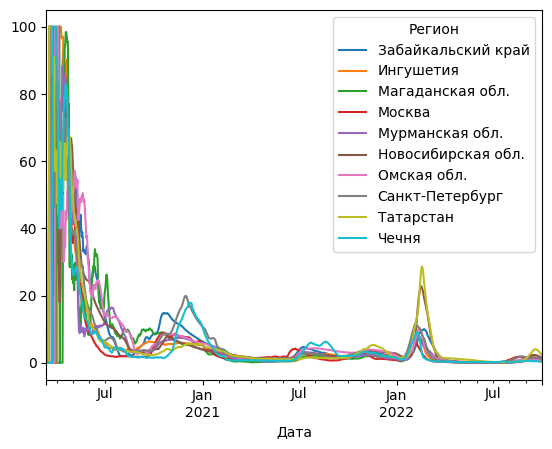

In [ ]:
df2['Infected_100kpd'] = df2['Заражений за день'].rolling(window = 7).sum()/df2['Заражений'] * 100
df2['Infected_100kpd'].loc[df2['Дата'] < '2020-03-18'] = 0 #end of 1st week
df2
df2['Infected_100kpd'] = df2['Infected_100kpd'].fillna(0)
df2.set_index(['Регион', 'Дата'], inplace =True)
df2.loc[regs]['Infected_100kpd'].unstack().T.plot()

### 4. Динамика прироста числа заражений
1. Постройте график изменения прироста числа заражений начиная с сентября 2021 года с помощью sns.lineplot(). Что произойдёт, если вы не введёте hue? Постройте и такой график.
2. Выведите оба графика в одной фигуре - в plt.subplots нужно указать число строк с помощью параметра nrows, однако, убедитесь, что получившийся график будет читаемым и различимым. *(выполните сразу оба графика в plt.subplots, отключите легенду, если она будет мешать)*

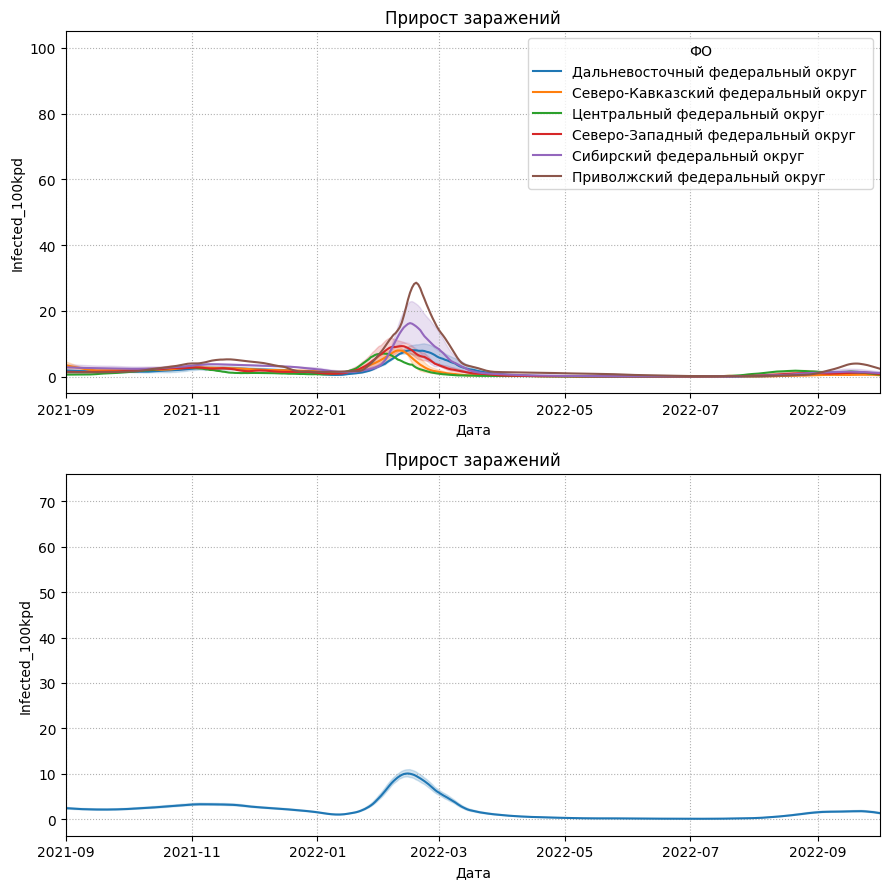

In [ ]:
# вывести 2 графика

fig, (ax1, ax2) = plt.subplots(2, figsize = [9, 9], dpi = 100)
sns.lineplot(x = 'Дата', y = 'Infected_100kpd',
              data = df2.loc[regs], # прирост заражений. по дням
              hue = 'ФО',
              ax = ax1)
sns.lineplot(x = 'Дата', y = 'Infected_100kpd',
              data = df2,
              ax = ax2)
ax1.set_title('Прирост заражений')
ax1.grid(ls =':')
ax2.set_title('Прирост заражений')
ax2.grid(ls =':')

ax1.set_xlim([pd.to_datetime('2021-09-01'), pd.to_datetime('2022-10-01')]);
ax2.set_xlim([pd.to_datetime('2021-09-01'), pd.to_datetime('2022-10-01')]);
plt.tight_layout()
plt.legend([],[], frameon=False)

### 5. Интерактивные графики (1 балл)

Постройте график №1 из предыдущей клетки с помощью bokeh, holoviews или plotly.

In [ ]:
!pip install holoviews
import holoviews as hv
import holoviews.plotting.bokeh

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
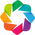

:NdOverlay   [ФО]
   :Scatter   [Дата,Infected_100kpd]   (ФО)

In [ ]:
hv.extension('bokeh')
scat = hv.Scatter(df2.loc[regs],
                  kdims=['Дата', 'Infected_100kpd'],
                  vdims=['ФО']
                    ).groupby(['ФО'])

scat.overlay('ФО').opts(height =700, width = 700)